In [1]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt

# Add workspace to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from seemps.analysis.mesh import RegularInterval

In [2]:
# Plot parameters
from tools import set_plot_parameters

set_plot_parameters()

# Styles
STYLE_G = {"color": "tab:blue", "linestyle": "solid"}
STYLE_O = {"color": "tab:red", "linestyle": "solid"}
STYLE_A = {"color": "tab:orange", "linestyle": "solid"}
STYLE_S = {"color": "tab:green", "linestyle": "solid"}

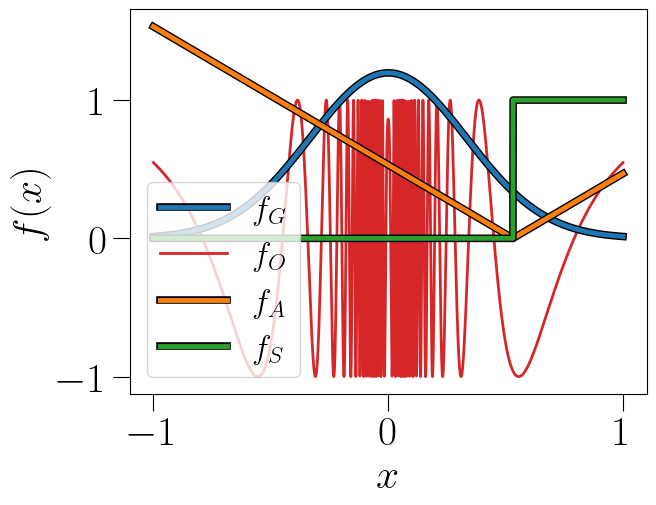

In [3]:
# fmt: off
from matplotlib import patheffects

# Define functions
gaussian = lambda x, sigma: 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x / sigma) ** 2)
trig = lambda x, eps: np.cos(1 / (x**2 + eps))
abs = lambda x, pos: np.abs(x - pos)
step = lambda x, pos: np.heaviside(x - pos, 0.5)

# Define interval
a, b = -1, 1
n = 12
x = RegularInterval(a, b, 2**n).to_vector()

# Plot functions
sigma = b / 3
eps = 0.01
pos = 1/2 + 1/2**5
path_effects = [patheffects.withStroke(linewidth=5.5, foreground="black")]
plt.plot(x, gaussian(x, sigma), **STYLE_G, label=r"$f_G$", zorder=2, path_effects=path_effects)
plt.plot(x, trig(x, eps), **STYLE_O, label=r"$f_O$", alpha=1, zorder=1, linewidth=2)
plt.plot(x, abs(x, pos), **STYLE_A, label=r"$f_A$", path_effects=path_effects)
plt.plot(x, step(x, pos), **STYLE_S, label=r"$f_S$", path_effects=path_effects)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend(loc="lower left", fontsize=24)
fig_path = "figures/functions_1d.pdf"
plt.savefig(fig_path, dpi=300, bbox_inches="tight")
plt.show()

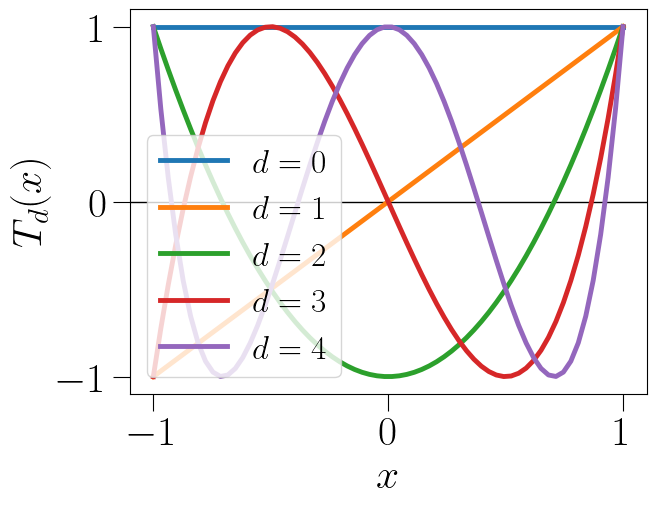

In [4]:
cheb_poly = lambda x, d: np.cos(d * np.arccos(x))

x = np.linspace(-1, 1, 2**6)
plt.axhline(y=0, color="black", linewidth=1)
for d in range(5):
    plt.plot(x, cheb_poly(x, d), "-", label=rf"$d = {d}$")

plt.xlabel(r"$x$")
plt.ylabel(r"$T_d(x)$")
plt.legend(fontsize=24, loc="lower left")

plt.savefig("figures/chebyshev_polynomials.pdf", dpi=300, bbox_inches="tight")